# Data Preparation

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load dataset
df1= pd.read_csv("https://raw.githubusercontent.com/learning-enisda/tpdm-kelompok13/master/datasets/tiktok_google_play_reviews.csv")

# Data Insight

In [ ]:
# take five samples of data randomly
df1.sample(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
185628,gp:AOqpTOFRnWH9hxgt6bsawpDzCa9pCgNr9A_IkARRWur...,Lisa Khanya,https://play-lh.googleusercontent.com/a/AATXAJ...,I like it,5,0,NaN,2022-02-19 07:23:58,NaN,NaN
307017,gp:AOqpTOE6-1pLSMvFE8yrNIekS_qRwf9PJrcfPugtBQk...,tiktok fyp,https://play-lh.googleusercontent.com/a/AATXAJ...,Good.ap keep.,5,0,NaN,2022-01-17 10:56:06,NaN,NaN
96025,gp:AOqpTOHv3XarlfQywI89jPo0G8nVrbVZogFYUgJjvwA...,Anne Holley,https://play-lh.googleusercontent.com/a-/AOh14...,This might sound super cliche and a bit contri...,5,29,23.6.4,2022-03-13 02:34:49,NaN,NaN
281881,gp:AOqpTOEkScVj_LpgmWwWeggQutvOPQwTKXjipIKc0V6...,Uzzal Hosain,https://play-lh.googleusercontent.com/a-/AOh14...,nice,1,0,22.9.5,2022-01-23 17:51:46,NaN,NaN
162515,gp:AOqpTOHnxRTgw7OKhVo16YyZFgjeUxNI95PIeA_lHbX...,M Ayaz ktpr,https://play-lh.googleusercontent.com/a/AATXAJ...,Yar mera Ticktot Account ap logo ne banned Kar...,5,0,23.4.3,2022-02-25 02:06:43,NaN,NaN


In [ ]:
# get the number of rows and columns
df1.shape

(307057, 10)

Dataset terdirdiri dari :
- 10 Kolom
- 307057 Baris

In [ ]:
# displays the column names in the data
df1.columns.values

array(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'], dtype=object)

Nama Kolom pada dataset:
- reviewId
- userName
- userImage
- content
- score
- thumbsUpCount
- reviewCreatedVersion
- at
- replyContent
- repliedAt

In [ ]:
# prints information about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307057 entries, 0 to 307056
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              307057 non-null  object
 1   userName              307057 non-null  object
 2   userImage             307057 non-null  object
 3   content               307053 non-null  object
 4   score                 307057 non-null  int64 
 5   thumbsUpCount         307057 non-null  int64 
 6   reviewCreatedVersion  217841 non-null  object
 7   at                    307057 non-null  object
 8   replyContent          119 non-null     object
 9   repliedAt             119 non-null     object
dtypes: int64(2), object(8)
memory usage: 23.4+ MB


Informasi data yang diperoleh :
- Tipe data pada dataset berupa tipe data objek dan integer
- Tidak terdapat missing value

In [ ]:
# counting the number of missing values in each column
df1.isnull().sum()

reviewId                     0
userName                     0
userImage                    0
content                      4
score                        0
thumbsUpCount                0
reviewCreatedVersion     89216
at                           0
replyContent            306938
repliedAt               306938
dtype: int64

Setelah ditampilkan terdapat missing value pada kolom:
- content (4)
- reviewCreatedVersion (89216)
- replyContent (306938)
- repliedAt (306938)

In [ ]:
# displaying the missing values
missing_value = df1.isnull().mean()
missing_value

reviewId                0.000000
userName                0.000000
userImage               0.000000
content                 0.000013
score                   0.000000
thumbsUpCount           0.000000
reviewCreatedVersion    0.290552
at                      0.000000
replyContent            0.999612
repliedAt               0.999612
dtype: float64

In [ ]:
# looking for duplicate data
print(df1.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
307052    False
307053    False
307054    False
307055    False
307056    False
Length: 307057, dtype: bool


# Data Cleaning

In [ ]:
# drop unnecessary columns
df1.drop(['reviewId', 'userName', 'userImage', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt'], inplace=True, axis=1)

In [ ]:
# fix missing value
df1 = df1.dropna(subset=['content'])

In [ ]:
# show data after cleaning
df1.head()

,content
0,Good
1,Awesome app! Too many people on it where it's ...
2,Not bad
3,It is good
4,Very interesting app


In [ ]:
# change the content label to review
df1 = df1.rename(columns={'content': 'review'})

# Machine Learning

In [ ]:
# import the necessary libraries for model
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
def extract_sentiment(review):
    
    # Create an object of SentimentIntensityAnalyzer class
    sia = SentimentIntensityAnalyzer()
    
    # Use the polarity_scores method to get the sentiment scores
    sentiment = sia.polarity_scores(review)
    
    # Check the compound score, if it's greater than 0, return 'positive'
    if sentiment['compound'] > 0:
        return 'positive'
    
    # Check the compound score, if it's less than 0, return 'negative'
    elif sentiment['compound'] < 0:
        return 'negative'
    
    # If the compound score is 0, return 'neutral'
    else:
        return 'neutral'

In [ ]:
# Create a new column 'sentiment' in the dataframe and apply the extract_sentiment function to each review
df1['sentiment'] = df1['review'].apply(extract_sentiment)

In [ ]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Assign the review column to the variable X and the sentiment column to the variable y
X = df1['review']
y = df1['sentiment']

# Use the train_test_split function to split the data into training and testing sets
# The test_size parameter is set to 0.2, meaning that 20% of the data will be used for testing
# The random_state parameter is set to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import CountVectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Create an object of CountVectorizer
cv = CountVectorizer()
# Use the fit_transform method to vectorize the text data in X_train
X_train_vect = cv.fit_transform(X_train)

# Import MultinomialNB from sklearn.naive_bayes
from sklearn.naive_bayes import MultinomialNB

# Create an object of MultinomialNB
clf = MultinomialNB()
# Use the fit method to fit the classifier with the training data
clf.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
# Use the transform method to vectorize the text data in X_test
X_test_vect = cv.transform(X_test)

# Use the predict method to predict the sentiment of the reviews in X_test
y_pred = clf.predict(X_test_vect)

In [ ]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use the accuracy_score function to calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [ ]:
# Create a list of new reviews
new_review = ["I love this app, it's so easy to use and has all the features I need."]

# Use the transform method of the cv object to vectorize the new reviews
new_review_vect = cv.transform(new_review)    

In [ ]:
# Use the predict method of the clf object to predict the sentiment of the new review
predicted_sentiment = clf.predict(new_review_vect)

# Print the predicted sentiment
print(predicted_sentiment)

['positive']


In [ ]:
# Use the predict_proba method of the clf object to predict the probability of each sentiment class for the new review
predicted_sentiment_proba = clf.predict_proba(new_review_vect)
# Print the predicted sentiment probability
print(predicted_sentiment_proba)

[[7.72646553e-05 4.07456216e-09 9.99922731e-01]]


## Calculate the percentage of positive, negative, and neutral sentiments

In [ ]:
sentiment_counts = df1['sentiment'].value_counts()
sentiment_percentage = (sentiment_counts / len(df1['sentiment'])) * 100
print("Percentage of Positive Sentiments: {:.2f}%".format(sentiment_percentage[0]))
print("Percentage of Negative Sentiments: {:.2f}%".format(sentiment_percentage[1]))
print("Percentage of Neutral Sentiments: {:.2f}%".format(sentiment_percentage[2]))

Percentage of Positive Sentiments: 65.05%
Percentage of Negative Sentiments: 27.15%
Percentage of Neutral Sentiments: 7.79%


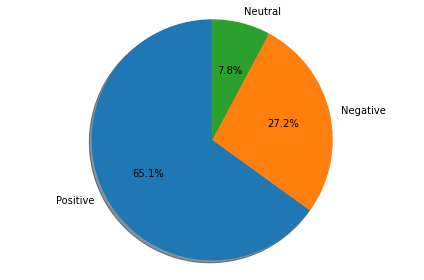

In [46]:
# ploting the Calculate the percentage of positive, negative, and neutral sentiments
import matplotlib.pyplot as plt

sentiment_counts = df1['sentiment'].value_counts()
sentiment_percentage = (sentiment_counts / len(df1['sentiment'])) * 100

labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment_percentage[0], sentiment_percentage[1], sentiment_percentage[2]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

## Model Evaluation

In [ ]:
# Import the accuracy_score and classification_report from sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Use the predict method to make predictions on the test data
y_pred = clf.predict(X_test_vect)

In [ ]:
# Use the accuracy_score function to calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.74%


In [ ]:
#Use the classification_report function to print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.62      0.56      0.59      4705
     neutral       0.95      0.42      0.58     16664
    positive       0.78      0.97      0.86     40042

    accuracy                           0.79     61411
   macro avg       0.78      0.65      0.68     61411
weighted avg       0.81      0.79      0.77     61411



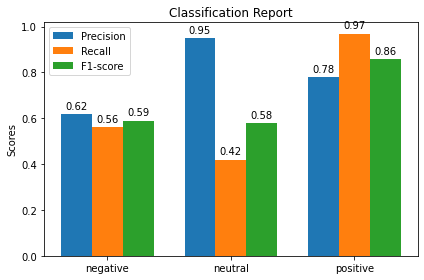

In [47]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['negative', 'neutral', 'positive']
precision = [0.62, 0.95, 0.78]
recall = [0.56, 0.42, 0.97]
f1_score = [0.59, 0.58, 0.86]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()